# Description

Here we simulate GD on a multifractional Brownian surface, and plot the figures in the Mathematical Model chapter of the thesis. The tools for simulating GD on a given landscape is included in the `multifractal_gd` directory. 

## Simulation

The following code is used to generate a sample trajectory

Figure not saved as savepath was not given.


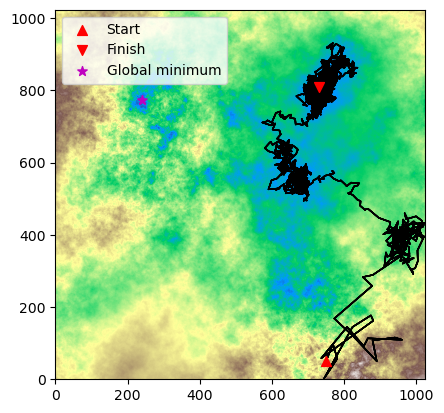

In [1]:
import multifractal_gd.gd_sim as gd_sim

##### Set parameters for simulation #####
lpath = 'data/multifractional_brownian_surface/landscape.mat' # Path to landscape
T = 10000 # Number of iterations
lr = 1.2e3 # Learning rate
xystart = [750, 50] # Starting position

add_noise = False # Imitate SGD
levy_vars = (2,0,0,1) # Levy alpha stable variables (alpha, beta, location, scale)

BCs = 'reflecting'

save_results = True 
save_path = "data/multifractional_brownian_surface/trajectory.mat" # Path for saving


##### Simulating GD #####
gd_sim.simulate_GD(lpath, T, lr, xystart, add_noise=add_noise, levy_vars=levy_vars, BCs = 'reflecting', save_results=save_results, save_path=save_path)

##### First look #####
gd_sim.plot_trajectory(save_path)

## Plot trajectory

Plots the figure of the trajectory used in the thesis.

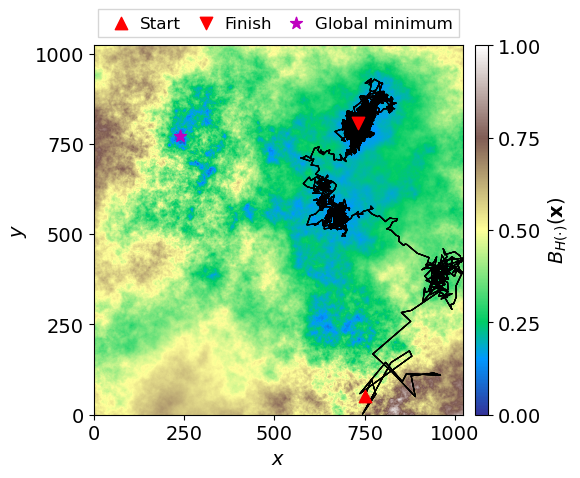

In [2]:
from scipy.io import savemat, loadmat
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm

BIGGER_SIZE = 14
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

data = loadmat("data/multifractional_brownian_surface/trajectory.mat")
landscape = data["landscape"]
traj = data["trajectory"]
segments = data["segments"]

fig, ax = plt.subplots()

# Plot trajectory
ax.imshow(landscape, cmap='terrain', origin='lower', rasterized=True)
# Plot trajectory with bold line
lw = 0.75
for elem in segments:
    if not elem[-1]:
        ax.plot(elem[0].flatten(), elem[1].flatten(), color='k', linewidth=lw, zorder=1)
    else:
        ax.plot(elem[0][0][:2].flatten(), elem[1][0]
                [:2].flatten(), color='k', linewidth=lw, zorder=1, rasterized=True)
        ax.plot(elem[0][0][2:4].flatten(), elem[1][0]
                [2:4].flatten(), color='k', linewidth=lw, zorder=1, rasterized=True)
    if len(elem[0][0]) == 6:
        ax.plot(elem[0][0][4:6].flatten(), elem[1][0]
                [4:6].flatten(), color='k', linewidth=lw, zorder=1, rasterized=True)
# Markers
ax.scatter(traj[0, 0], traj[0, 1], s=80, c='r',
            marker='^', label='Start', zorder=2, rasterized=True)
ax.scatter(traj[-1, 0], traj[-1, 1], s=80, c='r',
            marker='v', label='Finish', zorder=2, rasterized=True)
ind = np.where(landscape == np.min(landscape))
ax.scatter(ind[1], ind[0], s=80, c='m', marker='*', label='Global minimum', zorder=2, rasterized=True)

# Apperance
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_xticks([0,250,500, 750,1000])
ax.set_yticks([0,250,500, 750,1000])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          fancybox=False, shadow=False, ncol=3, fontsize=12, columnspacing=0.5, handletextpad=0.1)

cmap = plt.get_cmap('terrain')
norm = matplotlib.colors.Normalize(vmin=0,vmax=1)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([0.82, 0.11, 0.02, 0.77])
fig.colorbar(sm, ticks=[0,0.25,0.5,0.75,1], label=r'$B_{H(\cdot)}(\mathbf{x})$', cax=cbar_ax, orientation='vertical')
fig.savefig("figures/trajectory.pdf", dpi=600, bbox_inches='tight')
plt.show()

## TAMSD calculation

Calculate the TAMSD for the example above. This takes about a minute.

In [3]:
import multifractal_gd.msd_tools as msd_tools

##### The trajectory #####
# Use trajectory_continuous to account for reflecting boundary conditions
coords = loadmat("data/multifractional_brownian_surface/trajectory.mat")["trajectory_continuous"]

##### Set parameters for calculating TAMSD #####
# Actually take 200 iterations in, which puts the starting position in the blob on the right. 
# This produces the super-diffusion due to the correlated jumps down to the basin.
# Starting at the original position gives large steps that are rather uncorrelated, and the TAMSD curves are somewhat noisy.
# Arguments/intuition regarding super-diffusion still holds.
waiting_times = np.arange(200,1300,100) 
tau = 1000
tau = [tau] * waiting_times.shape[0]
windowsize = 1000

##### Calculation #####
# xs and ys are the x and y points for plotting
xs, ys = msd_tools.calculate_TAMSD(coords, waiting_times, tau, windowsize)
savemat("data/multifractional_brownian_surface/TAMSD.mat",{"xs": xs, "ys": ys})

##### A first look #####
# This is for a first look at the TAMSD; a nicer figure is below...
msd_tools.plot_TAMSD(xs, ys, waiting_times, save_path=None)

## Plot TAMSD

Plots the TAMSD for the example above.

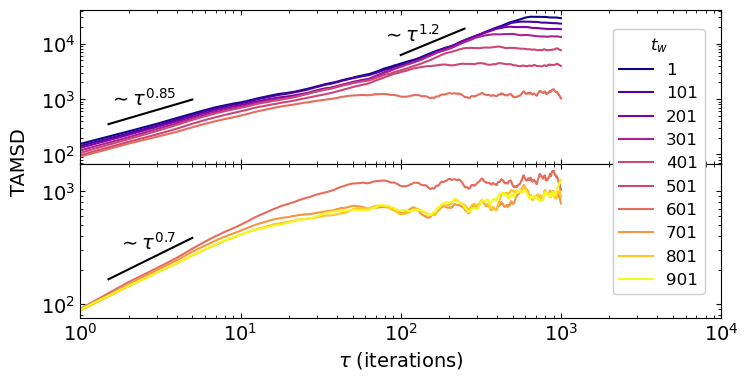

In [11]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Plot configurations
SMALLER_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALLER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Path to directory with tamsd mat files
path = "data/multifractional_brownian_surface/TAMSD.mat"
data = loadmat(path)
xs = data["xs"]
ys = data["ys"]
waiting_times = [1,101,201,301,401,501,601,701,801,901] 

# Colour map
cmap = plt.get_cmap("plasma")
regime1 = np.linspace(0,0.5,5,endpoint=True)
regime2 = np.linspace(0.5, 1, 5, endpoint=True)
colors = [cmap(i) for i in regime1] + [cmap(i) for i in regime2]
# Figure
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(8.27,4)) # for report 
ax1, ax2 = ax 
# Plot
transition = 6
for i in range(len(waiting_times)):
    if i < transition:
        ax1.loglog(xs[i], ys[i], c=colors[i], label=str(waiting_times[i]))
    elif i > transition:
        ax2.loglog(xs[i], ys[i], c=colors[i], label=str(waiting_times[i]))
    else:
        ax1.loglog(xs[i], ys[i], c=colors[i], label=str(waiting_times[i]))
        ax2.loglog(xs[i], ys[i], c=colors[i])
        
# Eye guides
X = np.array([1.5,5])
Y = X**0.85*250
ax1.plot(X,Y, 'k')
fig.text(0.16, 0.64, r'$\sim \tau^{0.85}$')
Y = X**0.7*125
ax2.plot(X,Y, 'k')
fig.text(0.17, 0.28, r'$\sim \tau^{0.7}$')
X = np.array([100,250])
Y = X**1.2*25
fig.text(0.49, 0.8, r'$\sim \tau^{1.2}$')
ax1.plot(X,Y, 'k')

# Legend
lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
legend = fig.legend(lines, labels, loc=5, bbox_to_anchor=(0.89,0.5), framealpha=1, title=r"$t_w$", fontsize=12)
plt.setp(legend.get_title(),fontsize=12)
# Appearance
plt.subplots_adjust(wspace=0, hspace=0)
ax1.tick_params(axis="both",which="both",direction="in", top=True, right=True)
ax2.tick_params(axis="both",which="both",direction="in", top=True, right=True)
ax1.set_xlim([1,1e4])
ax2.set_xlim([1,1e4])
ax2.set_xlabel(r"$\tau$ (iterations)")
fig.text(0.04, 0.5, 'TAMSD', va='center', rotation='vertical')
plt.show()
fig.savefig("figures/TAMSD_model.pdf", dpi=600, bbox_inches='tight')

## Diffusion exponents 

Calculate diffusion exponents with confidence intervals using linear regression. Particular lines are chosen in the respective regimes, although they can be also calculated for each line and then bootstrapping can be used. One just needs to be careful of the transition period.

In [12]:
import numpy as np
from scipy.io import loadmat

# Path to directory with tamsd mat files
path = "data/multifractional_brownian_surface/TAMSD.mat"
data = loadmat(path)
xs = data["xs"]
ys = data["ys"]

# Ignoring transition, find bootstrap mean and 95% CI for each regime 
# First regime; subdiffusive
x1 = xs[4,1:10]
y1 = ys[4,1:10]
logx1 = np.log(x1)
logy1 = np.log(y1)
p, V = np.polyfit(logx1,logy1,deg=1,cov=True)
sigma = np.sqrt(np.diagonal(V))[0]
print("sub in first regime = {:.3f} [{:.3f}, {:.3f}]".format(p[0], p[0]-2*sigma, p[0]+2*sigma))

# First regime; superdiffusive
x1 = xs[0,200:300]
y1 = ys[0,200:300]
logx1 = np.log(x1)
logy1 = np.log(y1)
p, V = np.polyfit(logx1,logy1,deg=1,cov=True)
sigma = np.sqrt(np.diagonal(V))[0]
print("super in first regime = {:.3f} [{:.3f}, {:.3f}]".format(p[0], p[0]-2*sigma, p[0]+2*sigma))

# Second regime; subdiffusive
x2 = xs[7,1:10]
y2 = ys[7,1:10]
logx2 = np.log(x2)
logy2 = np.log(y2)
p, V = np.polyfit(logx2,logy2,deg=1,cov=True)
sigma = np.sqrt(np.diagonal(V))[0]
print("sub in second regime = {:.3f} [{:.3f}, {:.3f}]".format(p[0], p[0]-2*sigma, p[0]+2*sigma))

sub in first regime = 0.838 [0.821, 0.856]
super in first regime = 1.213 [1.202, 1.224]
sub in second regime = 0.714 [0.698, 0.731]


# Numerical calculation of the Lyapunov exponent
We start the optimiser near the limiting basin (using the trajectory already generated). The procedure is given in https://sprott.physics.wisc.edu/chaos/lyapexp.htm

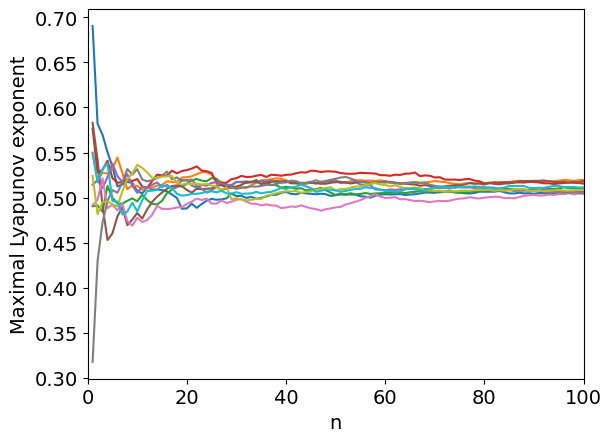

0.5106463390363776
[0.476853   0.54642202]


In [27]:
import numpy as np
from scipy.io import loadmat
import multifractal_gd.gd_sim as gd_sim
import matplotlib.pyplot as plt

##### Parameters #####
lr = 1200
d0 = 0.1 # Initial small separation
T = 10 # Calculate exponent after T iterations
direction = np.array([1,0]) # Direction of perturbation

##### Simulation using Sprott's algorithm #####
# Load landscape
landscape = loadmat("data/multifractional_brownian_surface/landscape.mat")["landscape"]

# Load starting point
data = loadmat("data/multifractional_brownian_surface/trajectory.mat")
traj = data["trajectory"]
start = traj[5000,:] # Arbitrary starting point at 5000th iteration

n_trials = 10
n_ests = 100
lyapunov_exponents = np.zeros(shape=(n_trials, n_ests))
# 10 random starting points (for bootstrap mean and 95% confidence interval calculation)
for i in range(n_trials):
    # Perturb starting point
    if i == 0:
        perturbation = np.array([0,0])
    else:
        perturbation = np.random.randn(2)
    start += perturbation
    # Calculate 100 estimates
    for j in range(n_ests):
        perturbed_start = start + direction * d0
        end = gd_sim.simulate_GD(landscape, T, lr, start, save_results=False)["trajectory"][-1,:]
        perturbed_end = gd_sim.simulate_GD(landscape, T, lr, perturbed_start, save_results=False)["trajectory"][-1,:]
        d1 = np.linalg.norm(perturbed_end - end)
        lyapunov_exponents[i,j] = np.log(d1/d0)/T
        # Update start and direction
        direction = (perturbed_end - end)/d1
        start = end

##### Visualisation #####
trials = np.arange(1,101)
X = trials

fig, ax = plt.subplots()
for i in range(lyapunov_exponents.shape[0]):
    Y = np.cumsum(lyapunov_exponents[i,:]) / trials
    ax.plot(X, Y)
ax.set_xlim([0,100])
ax.set_xlabel("n")
ax.set_ylabel("Maximal Lyapunov exponent")
plt.show()

##### Bootstrap results #####
np.random.seed(0)
estimates = lyapunov_exponents[:,-1].flatten()

# Bootstrap resampling to find confidence intervals
N = 10
N_expts = 1000
bootstrap_mean = []
for i in range(N_expts):
    indices = np.random.randint(N, size=N)
    bootstrap_mean.append( np.mean(estimates[indices]) )
mean_mean = np.mean(bootstrap_mean)
percentiles_mean = np.percentile(bootstrap_mean, [2.5, 97.5])
print(mean_mean)
print(percentiles_mean)

## Dependence of diffusion exponent on Hölder exponent

Five sample trajectories of GD were simulated on fractional Brownian surfaces with Hölder exponents ranging from 0.1 to 0.9. The estimated diffusion exponents were saved (estimated using the method shown above for the first decade only). Loading the saved results, we calculate bootstrap mean and 95% confidence intervals.

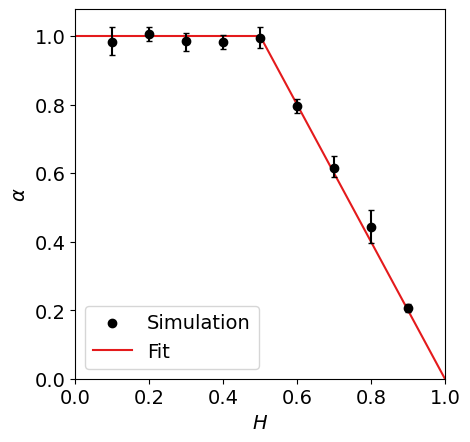

In [10]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from multifractal_gd.general_tools import squarify

# Plot configurations
BIGGER_SIZE = 14
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

H = np.arange(0.1,1,0.1)
alphas = loadmat("data/fractional_brownian_surfaces/alphas.mat")["alphas"]

# Bootstrap resampling to find confidence intervals
N = 5
N_expts = 1000
np.random.seed(0)
errorbars = np.zeros(shape=(2,9))
means = np.zeros(9)
for j in range(9):
    mean_bootstrap = np.zeros(N_expts)
    for i in range(N_expts):
        indices = np.random.randint(N, size=N)
        alpha_j = alphas[j,:].flatten()
        alpha_sample = alpha_j[indices]
        mean_bootstrap[i] = np.mean(alpha_sample)
    mean_mean = np.mean(mean_bootstrap)
    percentiles_mean = np.percentile(mean_bootstrap, [2.5, 97.5])
    errorbars[0,j] = np.abs(mean_mean - percentiles_mean[0])
    errorbars[1,j] = np.abs(mean_mean - percentiles_mean[1])
    means[j] = mean_mean
fig, ax = plt.subplots()
ax.errorbar(H.flatten(), means.flatten(), yerr = errorbars, fmt = 'none', capsize = 2, color='k')
ax.scatter(H, means, color='k', zorder=10, label='Simulation')
ax.plot([0,0.5], [1,1], color='#e41a1c', zorder=0, label='Fit')
ax.plot([0.5,1], [1,0], color='#e41a1c', zorder=0)
ax.legend(loc=3)
ax.set_xlabel(r'$H$')
ax.set_ylabel(r'$\alpha$')
ax.set_xlim([0,1])
ax.set_ylim(ymin=0)
squarify(fig)
fig.savefig("figures/alpha_vs_H.pdf", dpi=600, bbox_inches='tight')
plt.show()